# Example of time series line chart with two levels of x-axis labels and automatic ordering of month names

For this we require the "dates" module from `matplotlib`, which contains a function that ensure `matplotlib` creates an x-axis that aligns with the date period in the data and a function that allows us to format the date/time the way we wish to display them.

In [39]:
import pandas as pd                     # For importing and manipulating the data
import matplotlib.pyplot as plt         # For creating chart plots and fine-tuning chart output
import matplotlib.dates as mdates       # For mapping date and time elements to datetime data
import seaborn as sns                   # Use nice Seaborn formatting in charts

sns.set_style('darkgrid')               # Set the Seaborn style to shaded background with white gridlines

Let's import our data and have an initial look at it. We have some simple time-series data.

In [40]:
file = './simple_monthly_timeseries_data.csv'

df_import = pd.read_csv(file)

df_import.head()

,Month,Activity
0,01/01/2019,433
1,01/02/2019,635
2,01/03/2019,643
3,01/04/2019,645
4,01/05/2019,770


Let's check what data types we have in our dataframe.

In [41]:
df_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     36 non-null     object
 1   Activity  36 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 704.0+ bytes


Our Month column is listed as an object, whereas we need it to be the datetime data type.

In [42]:
df_processed = df_import.copy()

df_processed['Month'] = pd.to_datetime(df_processed['Month'], dayfirst= True)

df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Month     36 non-null     datetime64[ns]
 1   Activity  36 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 704.0 bytes


Remember to put **dayfirst= True** when working with dd/mm/yyyy format dates since the default is for the first two digits to be treated as the month.

In this example, the month is represented by the first day of the month in the format dd/mm/yyyy, e.g. 01/05/2020 for May 2020.

If you do not put **dayfirst= True**, "01/05/2020" will be interpreted as the 5th of January 2020, and the chart will present the data incorrectly in the chart.

![Date converted incorrectly](./data_imported_incorrectly.png)

### Now we can create the chart

We need to make use of `matplotlib.mdates` Locators and Formatters to identify dates correctly and apply the desired formatting.

The Locators are required in order for `matplotlib` to create an x-axis that aligns with the datetimes in the data. If this is not done correctly, `matplotlib` treats the first value in the data as the first date in the UNIX epoch, the 1st of January 1970.

[Unix time Wikipedia article](https://en.wikipedia.org/wiki/Unix_time)

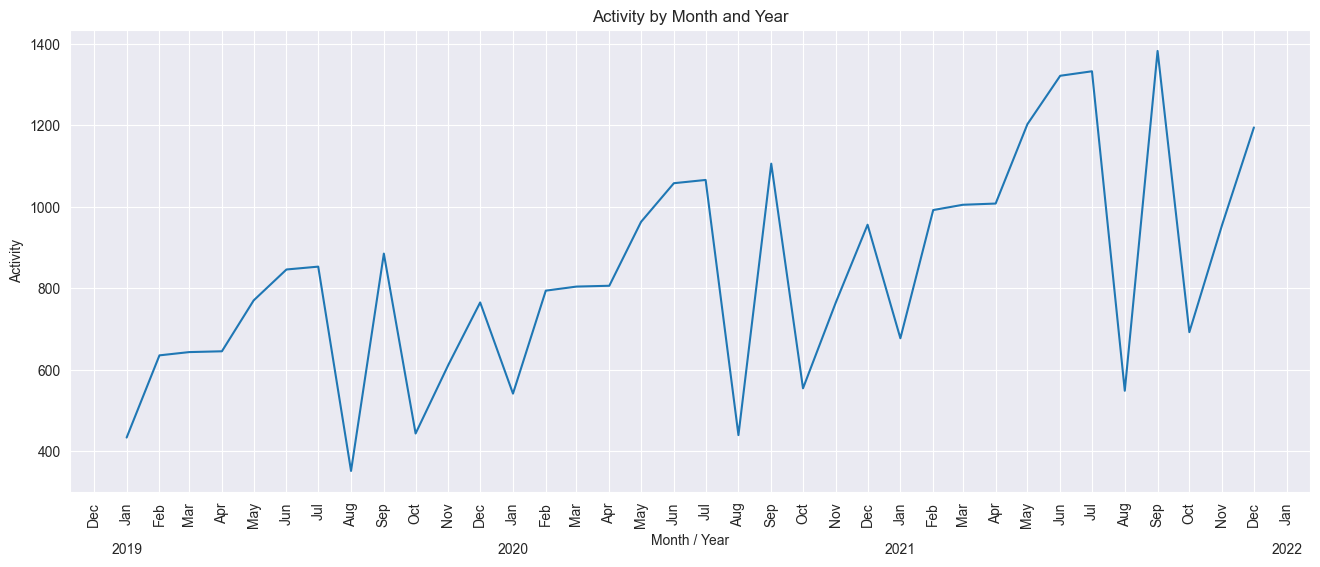

In [43]:
plt.figure(figsize=(16,6))
plt.grid(True, which= 'both')
ax = sns.lineplot(data= df_processed, x= df_processed['Month'], y= df_processed['Activity'])

# Firstly, label the primary x-axis. You need to do this for the major and minor ticks to ensure that all labels get formatted the same way.
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b')) # %b is the short month format e.g. 'Oct' for October
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
ax.tick_params(labelsize = 10, which='both') # Set the label font size and apply the formatting to the major and minor ticks.

# Add a secondary x-axis displaying the years just below the months
sec_xaxis = ax.secondary_xaxis(-0.1) # the argument relates to each label's vertical position.
sec_xaxis.xaxis.set_major_locator(mdates.YearLocator())
sec_xaxis.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
sec_xaxis.spines['bottom'].set_visible(False) # Remove the spines to reduce clutter
sec_xaxis.tick_params(length = 0, labelsize = 10)

# Rotate the short month labels in the primary x-axis.
for label in ax.get_xticklabels(which='both'):
    label.set(rotation = 90, horizontalalignment='center')

# If you wanted to also rotate the secondary x-axis labels, you would replace "ax" with "sec_xaxis", i.e. the variable name for the secondary axis labels.

# Add the title and axis labels, and plot the chart.
plt.xlabel('Month / Year')
plt.ylabel('Activity')
plt.title('Activity by Month and Year')
plt.show()